# Embeddings + Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

## Metadata vs Lane
    * Metadata is the full dataset annotations
    * Lane is referres to the 'clean' version
    
    Note: The filenames column have the whole path to the image :)
    
    The data is sampled at 20Hz


In [3]:
# Open all 
lane1 = pd.read_csv('Dataset/2016-01-30--11-24-51/Metadata/lane_df.csv',index_col=0)

#lane2 = pd.read_csv('Dataset/2016-01-30--13-46-00/Metadata/lane_df.csv',index_col=0)

#lane3 = pd.read_csv('Dataset/2016-01-31--19-19-25/Metadata/lane_df.csv',index_col=0)

lane4 = pd.read_csv('Dataset/2016-02-02--10-16-58/Metadata/lane_df.csv',index_col=0)

lane5 = pd.read_csv('Dataset/2016-02-08--14-56-28/Metadata/lane_df.csv',index_col=0)

lane6 = pd.read_csv('Dataset/2016-02-11--21-32-47/Metadata/lane_df.csv',index_col=0)

lane7 = pd.read_csv('Dataset/2016-03-29--10-50-20/Metadata/metadata.csv',index_col=0)

#lane8 = pd.read_csv('Dataset/2016-03-29--10-50-20/Metadata/metadata.csv',index_col=0)

#lane9 = pd.read_csv('Dataset/2016-04-21--14-48-08/Metadata/metadata.csv',index_col=0)

#lane10 = pd.read_csv('Dataset/2016-05-12--22-20-00/Metadata/metadata.csv',index_col=0)

#lane11 = pd.read_csv('Dataset/2016-06-02--21-39-29/Metadata/metadata.csv',index_col=0)

#test = pd.read_csv('Dataset/2016-06-08--11-46-01/Metadata/metadata.csv',index_col=0)



In [4]:
X = []
Y = []
for df in [lane1, lane5, lane6, lane7]:#, lane8, lane9, lane10]:
    X.append(df['filenames'].values)
    Y.append(df['steering_angle'].values)

X = np.concatenate(X)
Y = np.concatenate(Y).astype('float32')

# Subsample at 10 Hz
X = X[::2]
Y = Y[::2]

print('Shape X', np.shape(X))
print('Shape Y', np.shape(Y))

Shape X (93054,)
Shape Y (93054,)


## Opening images using the lane reference

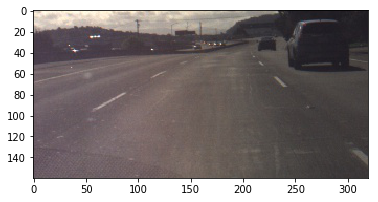

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

filename = lane1['filenames'].iloc[0]
img = np.array(image.load_img(filename))
plt.imshow(img)

## Loading model

In [19]:
from keras.models import load_model
import keras as K

def rmse(y_true, y_pred):
        return K.backend.sqrt(K.backend.mean(K.backend.square(y_pred - y_true), axis=-1)) 

    
model = load_model('checkpoint_nvidia_model.hdf5', custom_objects={'rmse': rmse})

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 78, 158, 24)       1824      
_________________________________________________________________
batch_normalization_6 (Batch (None, 78, 158, 24)       96        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 77, 36)        21636     
_________________________________________________________________
batch_normalization_7 (Batch (None, 37, 77, 36)        144       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 17, 37, 48)        43248     
_________________________________________________________________
batch_normalization_8 (Batch (None, 17, 37, 48)        192       
__________

In [21]:
for i in range(3):
    model.pop()

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 78, 158, 24)       1824      
_________________________________________________________________
batch_normalization_6 (Batch (None, 78, 158, 24)       96        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 37, 77, 36)        21636     
_________________________________________________________________
batch_normalization_7 (Batch (None, 37, 77, 36)        144       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 17, 37, 48)        43248     
_________________________________________________________________
batch_normalization_8 (Batch (None, 17, 37, 48)        192       
__________

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/engine/training.py:478: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


## Generate Embeddings

In [25]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 2.3MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.


In [33]:
from tqdm import tqdm
embeddings = []
for i in tqdm(range(X.shape[0])):
    embeddings.append(model.predict(np.expand_dims(process_line(X[i]), axis=0)))


  3%|▎         | 3036/93054 [00:14<07:14, 207.08it/s]


  6%|▋         | 5935/93054 [00:29<07:12, 201.24it/s]


  9%|▉         | 8514/93054 [00:44<07:21, 191.53it/s]


 12%|█▏        | 11190/93054 [00:59<07:12, 189.16it/s]


 15%|█▍        | 13820/93054 [01:13<07:03, 187.24it/s]


 18%|█▊        | 16405/93054 [01:28<06:53, 185.22it/s]


 20%|██        | 18869/93054 [01:43<06:46, 182.61it/s]


 23%|██▎       | 21286/93054 [01:57<06:37, 180.47it/s]


 25%|██▌       | 23691/93054 [02:12<06:28, 178.69it/s]


 28%|██▊       | 26330/93054 [02:27<06:12, 178.93it/s]


 31%|███▏      | 29087/93054 [02:41<05:55, 179.81it/s]


 34%|███▍      | 31805/93054 [02:56<05:39, 180.19it/s]


 37%|███▋      | 34561/93054 [03:11<05:23, 180.74it/s]


 40%|████      | 37299/93054 [03:25<05:07, 181.20it/s]


 43%|████▎     | 40032/93054 [03:40<04:51, 181.65it/s]


 46%|████▌     | 42813/93054 [03:55<04:35, 182.09it/s]


 49%|████▉     | 45590/93054 [04:09<04:19, 182.56it/s]


 52%|█████▏    | 48368/93054 [04:24<04:04, 182.92it/s]


 55%|█████▍    | 51161/93054 [04:39<03:48, 183.33it/s]


 58%|█████▊    | 53961/93054 [04:53<03:32, 183.67it/s]


 61%|██████    | 56776/93054 [05:08<03:17, 184.06it/s]


 64%|██████▍   | 59564/93054 [05:23<03:01, 184.36it/s]


 67%|██████▋   | 62201/93054 [05:37<02:47, 184.11it/s]


 69%|██████▉   | 64634/93054 [05:52<02:35, 183.31it/s]


 72%|███████▏  | 67152/93054 [06:07<02:21, 182.80it/s]


 75%|███████▍  | 69664/93054 [06:22<02:08, 182.36it/s]


 77%|███████▋  | 72102/93054 [06:36<01:55, 181.78it/s]


 80%|████████  | 74517/93054 [06:51<01:42, 181.16it/s]


 83%|████████▎ | 76915/93054 [07:05<01:29, 180.56it/s]


 85%|████████▌ | 79316/93054 [07:20<01:16, 180.05it/s]


 88%|████████▊ | 81426/93054 [07:36<01:05, 178.57it/s]


 90%|█████████ | 83909/93054 [07:50<00:51, 178.23it/s]


 93%|█████████▎| 86326/93054 [08:05<00:37, 177.87it/s]


 95%|█████████▌| 88765/93054 [08:20<00:24, 177.51it/s]


 98%|█████████▊| 91165/93054 [08:34<00:10, 177.13it/s]


100%|██████████| 93054/93054 [08:46<00:00, 176.84it/s]


In [38]:
np.shape(embeddings)
embeddings = np.array(embeddings)

In [36]:
# Normalize target
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

scaler.fit(Y.reshape(-1,1))

y = scaler.transform(Y.reshape(-1,1))


## Grouping in pairs of 10 images

In [157]:
group_pack = []
y_pack = []


for i in tqdm(range(0, embeddings.shape[0]-10, 10)):
    pack = []
    for j in range(10):
        pack.append(embeddings[i+j])
    y_pack.append(y[i+10])
    group_pack.append(np.array(pack))
        


100%|██████████| 9305/9305 [00:00<00:00, 74522.44it/s]

In [166]:
group_pack = np.array(group_pack)
np.shape(group_pack)

(9305, 10, 1, 100)

In [167]:
y_pack = np.array(y_pack)
np.shape(y_pack)

(9305, 1)

In [168]:
import random
proportion = 1
# Generate a random selection of indexes
indexes = random.sample(range(0, group_pack.shape[0]), int(group_pack.shape[0]*proportion))

# Select desired examples
shuffle_X = group_pack[indexes]
shuffle_Y = y_pack[indexes].astype('float32')

In [169]:
shuffle_X = shuffle_X.reshape(-1,10,100,1)

In [170]:
np.shape(shuffle_X[0])

(10, 100, 1)

In [171]:
np.shape(x_train)

(5815, 16, 100, 1)

In [184]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = shuffle_X[:8000]
y_train = shuffle_Y[:8000]
x_test = shuffle_X[8000:]
y_test = shuffle_Y[8000:]

#model = baseline(input_shape=(10,100,1))
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
#model.add(Dense(64, activation='relu', input_dim=(10,100)))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss=rmse,
#              optimizer=sgd,
#              metrics=['accuracy'])

input_shape= (10,100,1)
model = Sequential()
    
#model.add(Lambda(lambda x: x/127.5-1.0, input_shape=input_shape))
model.add(Conv2D(24, (1, 1), activation='elu', strides=(1, 1), input_shape=input_shape))
#model.add(BatchNormalization())

model.add(Conv2D(36, (1, 1), activation='elu', strides=(1, 1)))
#model.add(BatchNormalization())

#model.add(Conv2D(48, (5, 5), activation='elu', strides=(1, 1)))
#model.add(BatchNormalization())

#model.add(Conv2D(64, (3, 3), activation='elu'))
#model.add(BatchNormalization())

#model.add(Conv2D(64, (3, 3), activation='elu'))
#model.add(BatchNormalization())

model.add(Dropout(0.15))
model.add(Flatten())

model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

adam = Adam(lr=1e-4)
model.compile(optimizer=adam, loss=rmse)

#model.fit(x_train, y_train,
#          epochs=20,
#          batch_size=128)
#score = model.evaluate(x_test, y_test, batch_size=128)

In [185]:
model.fit(x_train, y_train,
          epochs=25,
          batch_size=128,
          validation_split=0.20)
score = model.evaluate(x_test, y_test, batch_size=128)

Train on 6400 samples, validate on 1600 samples
Epoch 1/25
6400/6400 [==============================] - 3s 488us/step - loss: 0.1860 - val_loss: 0.1315
Epoch 2/25
6400/6400 [==============================] - 1s 173us/step - loss: 0.1152 - val_loss: 0.1148
Epoch 3/25
6400/6400 [==============================] - 1s 173us/step - loss: 0.1057 - val_loss: 0.1093
Epoch 4/25
6400/6400 [==============================] - 1s 174us/step - loss: 0.0952 - val_loss: 0.1041
Epoch 5/25
6400/6400 [==============================] - 1s 176us/step - loss: 0.0879 - val_loss: 0.1007
Epoch 6/25
6400/6400 [==============================] - 1s 173us/step - loss: 0.0825 - val_loss: 0.0982
Epoch 7/25
6400/6400 [==============================] - 1s 176us/step - loss: 0.0801 - val_loss: 0.1083
Epoch 8/25
6400/6400 [==============================] - 1s 176us/step - loss: 0.0785 - val_loss: 0.0973
Epoch 9/25
6400/6400 [==============================] - 1s 176us/step - loss: 0.0745 - val_loss: 0.0972
Epoch 10/25
6400

In [186]:
model.save('time_model_c.hdf5')

In [187]:
np.shape(x_train)

(8000, 10, 100, 1)

In [188]:
np.shape(embeddings.reshape(-1,100))

(93054, 100)

In [189]:
x_L = group_pack.reshape(-1,10,100)
y_L = np.array(y_pack).reshape(-1)

In [196]:
np.shape(y_L)

(9305,)

In [195]:
np.shape(x_L)

(9305, 10, 100)

In [206]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

#max_features = 100

model = Sequential()
#model.add(Embedding(1000, output_dim=256))
model.add(LSTM(128, input_shape=(10,100)))
#model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=rmse,
              optimizer='adam')

model.fit(x_L, y_L, batch_size=16, epochs=15, validation_split=15)
#score = model.evaluate(x_test, y_test, batch_size=16)


Epoch 1/15
9305/9305 [==============================] - 15s 2ms/step - loss: 0.0972
Epoch 2/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0865
Epoch 3/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0841
Epoch 4/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0828
Epoch 5/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0819
Epoch 6/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0817
Epoch 7/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0811
Epoch 8/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0809
Epoch 9/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0807
Epoch 10/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0805
Epoch 11/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0805
Epoch 12/15
9305/9305 [==============================] - 12s 1ms/step - lo

In [212]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

#max_features = 100

model2 = Sequential()
#model.add(Embedding(1000, output_dim=256))
model2.add(LSTM(128, input_shape=(10,100)))
#model.add(LSTM(128))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='linear'))

model2.compile(loss=rmse,
              optimizer='adam')

model2.fit(x_L, y_L, batch_size=16, epochs=15, validation_split=15)
#score = model.evaluate(x_test, y_test, batch_size=16)



Epoch 1/15
9305/9305 [==============================] - 15s 2ms/step - loss: 0.2041
Epoch 2/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.1160
Epoch 3/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.1042
Epoch 4/15
9305/9305 [==============================] - 13s 1ms/step - loss: 0.0957
Epoch 5/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0919
Epoch 6/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0875
Epoch 7/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0861
Epoch 8/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0840
Epoch 9/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0830
Epoch 10/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0823
Epoch 11/15
9305/9305 [==============================] - 12s 1ms/step - loss: 0.0804
Epoch 12/15
9305/9305 [==============================] - 12s 1ms/step - lo

In [213]:
model2.save('ltsm_rmse.hdf5')

# Agregar la prediccion anterior al vector de embeddings
NOTA: es mejor hacer una append de la prediccion del modelo del embedding

In [ ]:
#

In [242]:
group_pack2 = []
y_pack2 = []

y = y.reshape(-1)
for i in tqdm(range(1, embeddings.shape[0]-10, 10)):
    pack = []
    for j in range(10):
        pack.append(np.append(embeddings[i+j],y[i+j-1]))
    y_pack2.append(y[i+10])
    group_pack2.append(np.array(pack))



100%|██████████| 9305/9305 [00:00<00:00, 15484.19it/s]

In [243]:
np.shape(group_pack2)

(9305, 10, 101)

In [253]:
x_L2 = np.array(group_pack2)

y_L2 = np.array(y_pack2).reshape(-1)

In [257]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

#max_features = 100

model3 = Sequential()
#model.add(Embedding(1000, output_dim=256))
model3.add(LSTM(128, input_shape=(10,101)))
#model.add(LSTM(128))
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='linear'))

model3.compile(loss=rmse,
              optimizer='adam')

model3.fit(x_L2, y_L2, batch_size=16, epochs=15, validation_split=.15)
#score = model.evaluate(x_test, y_test, batch_size=16)

Train on 7909 samples, validate on 1396 samples
Epoch 1/15
7909/7909 [==============================] - 15s 2ms/step - loss: 0.1648 - val_loss: 0.1345
Epoch 2/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0897 - val_loss: 0.1052
Epoch 3/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0782 - val_loss: 0.0984
Epoch 4/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0705 - val_loss: 0.0980
Epoch 5/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0662 - val_loss: 0.0976
Epoch 6/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0627 - val_loss: 0.0917
Epoch 7/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0601 - val_loss: 0.0930
Epoch 8/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0586 - val_loss: 0.0889
Epoch 9/15
7909/7909 [==============================] - 11s 1ms/step - loss: 0.0564 - val_loss: 0.0886
Epoch 10/15
7909/7909 [==

In [258]:
model3.save('model101.hd5f')

In [23]:
from keras.utils import Sequence
class Batch_generator(Sequence):
    '''Generates batches of images and labels on the fly from disc. 
    Uses process_line() function to perform image reading transformation.
    x_set: Numpy array with filenames (strings)
    y_set: Numpy array with binary gender labels (0,1)
    batch_size: Number of samples per batch
    '''
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size


    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
            self.batch_size]

        return np.array([process_line(file_name)
                   for file_name in batch_x]), batch_y.astype('float32')

    
def process_line(filename):
    '''Process one line of the batch directory.------------------------
     # Open image from lfw/ folder. Convert it to Numpy array    
    '''
    return  np.array(image.load_img(filename)).astype('float32')



In [61]:
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input, Lambda, Conv2D
#from keras_vggface.vggface import VGGFace
#from keras_vggface import utils
from keras.preprocessing import image
from keras.utils import np_utils
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json, Sequential
from keras.utils import Sequence
from keras.layers import Flatten, BatchNormalization, Activation, MaxPool2D, Dropout
import math
import keras


def baseline(input_shape=(160,320,3), dropout=0.1):
    """
   Classic NVIDIA model.
    """
    model = Sequential()
    
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=input_shape))
    model.add(Conv2D(24, (5, 5), activation='elu', strides=(2, 2), input_shape=input_shape))
    #model.add(BatchNormalization())

    model.add(Conv2D(36, (5, 5), activation='elu', strides=(2, 2)))
    #model.add(BatchNormalization())

    model.add(Conv2D(48, (5, 5), activation='elu', strides=(2, 2)))
    #model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), activation='elu'))
    #model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), activation='elu'))
    #model.add(BatchNormalization())
    
    model.add(Dropout(dropout))
    model.add(Flatten())
    
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    
    adam = Adam(lr=1e-4)
    model.compile(optimizer=adam, loss=rmse)
    
    #model.summary()

    return model



In [40]:
from keras.layers import ELU

import keras as K

def rmse(y_true, y_pred):
        return K.backend.sqrt(K.backend.mean(K.backend.square(y_pred - y_true), axis=-1)) 

    

In [9]:
# Normalize target
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

scaler.fit(Y.reshape(-1,1))

y = scaler.transform(Y.reshape(-1,1))


In [10]:
import random
proportion = 1
# Generate a random selection of indexes
indexes = random.sample(range(0, X.shape[0]), int(X.shape[0]*proportion))

# Select desired examples
shuffle_X = X[indexes]
shuffle_Y = y[indexes].astype('float32')


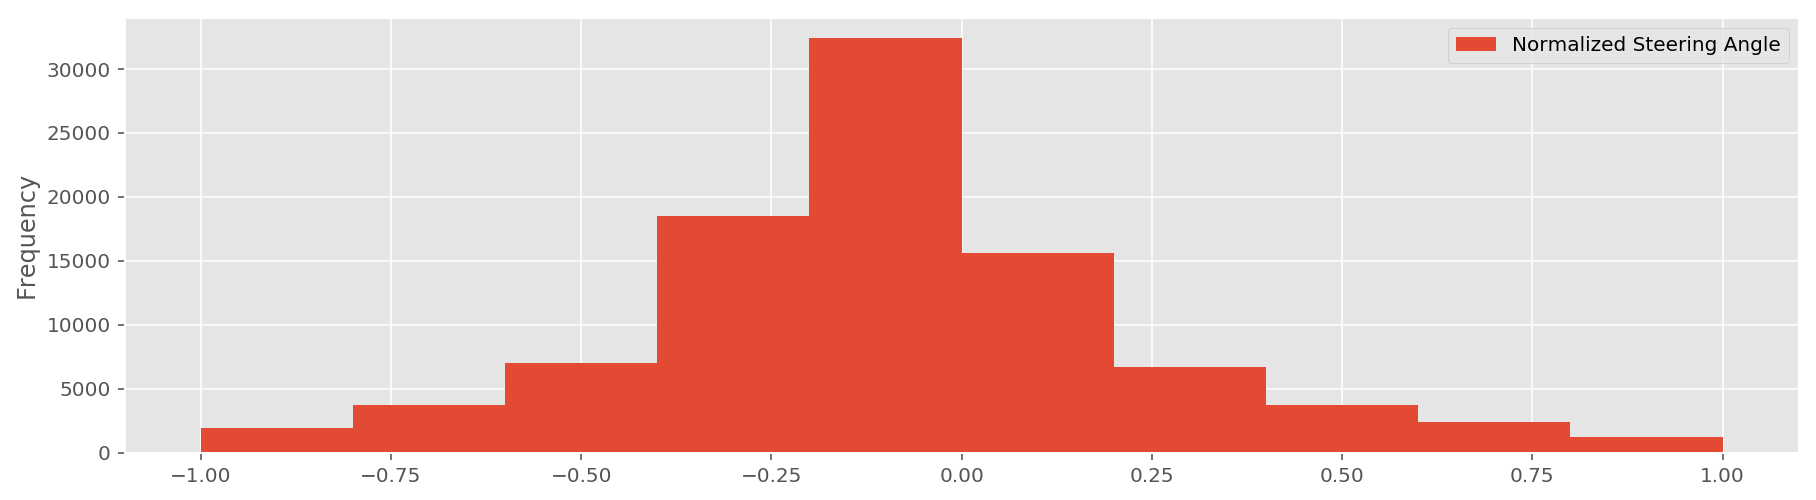

In [24]:
df_y = pd.DataFrame(shuffle_Y)
df_y.columns = ['Normalized Steering Angle']
df_y.plot.hist()

In [6]:
!pip install pydot

    100% |████████████████████████████████| 133kB 3.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydot ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/6a/a5/14/25541ebcdeaf97a37b6d05c7ff15f5bd20f5e91b99d313e5b4
Successfully built pydot
distributed 1.21.8 requires msgpack, which is not installed.


In [26]:
from keras.utils import plot_model
model = baseline()

plot_model(model, to_file='nvidia_no_BN.png', show_shapes=True)

In [27]:

# Create batch generator for training and validation
#img_path = './CACD_NUMPY/'
batch_size = 100

train_X = shuffle_X[:75000]
train_Y = shuffle_Y[:75000]

val_X = shuffle_X[75000:89000]
val_Y = shuffle_Y[75000:89000]

test_X = shuffle_X[89000:]
test_Y = shuffle_Y[89000:]

# Initialize batch generators
train_gen = Batch_generator(train_X, train_Y, batch_size)
val_gen = Batch_generator(val_X, val_Y, batch_size)


steps_per_epoch = int(train_X.shape[0] / batch_size)
validation_steps = int(val_X.shape[0] / batch_size)

# Create model
#model = baseline()
#model = commaai_model()
# For a binary classification problem
#model.compile(optimizer='SGD',
#              loss='mse')


# Configure Keras Callbacks
model_name = 'checkpoint_nvidia_model_noBN.hdf5'
min_delta=.0005
patience = 5

#checkpoint to save model after each epoch
snapshot = keras.callbacks.ModelCheckpoint(model_name, 
                                            monitor='val_loss', 
                                            verbose=1, 
                                            save_best_only=True, 
                                            mode='min')

# Learning rate scheduler
reduce_LR  = ReduceLROnPlateau(monitor='val_loss',factor=0.5,
                               patience=3,verbose=True)

#stop training if the validation error stops improving.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=min_delta, 
                                           patience=patience, 
                                           verbose=1, 
                                           mode='auto')

# Training step
history = model.fit_generator(train_gen, steps_per_epoch=steps_per_epoch,
                    epochs=100, verbose=1,
                    callbacks=[early_stop, reduce_LR, snapshot], validation_data=val_gen,
                    validation_steps= validation_steps, class_weight=None,
                    max_queue_size=10, workers=8,
                    use_multiprocessing=True, shuffle=True, initial_epoch=0)

model.save('last_nvidia_model_noBN.hdf5')


Epoch 1/100
750/750 [==============================] - 207s 276ms/step - loss: 0.2125 - val_loss: 0.1864

Epoch 00001: val_loss improved from inf to 0.18640, saving model to checkpoint_nvidia_model_noBN.hdf5
Epoch 2/100
750/750 [==============================] - 205s 273ms/step - loss: 0.1723 - val_loss: 0.1617

Epoch 00002: val_loss improved from 0.18640 to 0.16166, saving model to checkpoint_nvidia_model_noBN.hdf5
Epoch 3/100
750/750 [==============================] - 204s 272ms/step - loss: 0.1485 - val_loss: 0.1478

Epoch 00003: val_loss improved from 0.16166 to 0.14783, saving model to checkpoint_nvidia_model_noBN.hdf5
Epoch 4/100
750/750 [==============================] - 203s 271ms/step - loss: 0.1320 - val_loss: 0.1336

Epoch 00004: val_loss improved from 0.14783 to 0.13364, saving model to checkpoint_nvidia_model_noBN.hdf5
Epoch 5/100
750/750 [==============================] - 202s 269ms/step - loss: 0.1188 - val_loss: 0.1279

Epoch 00005: val_loss improved from 0.13364 to 0.1

In [30]:
from keras.models import load_model

In [36]:
net = load_model('_nvidia_model.hdf5',custom_objects={'rmse': rmse})

OSError: Unable to open file (unable to open file: name = 'last_nvidia_model.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)